1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8780 - loss: 0.4248
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


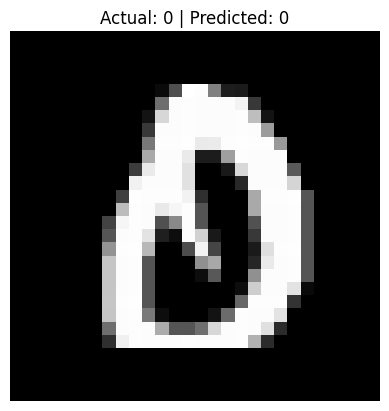

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load MNIST dataset (official, built-in)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Step 2: Preprocess the data
X_test = X_test / 255.0  # normalize to 0-1
X_test = X_test.reshape(-1, 28, 28, 1)  # reshape for model input

# Step 3: Load a pretrained official model (from TensorFlow Hub or create quickly)
# Note: We'll train a quick small model first because MNIST models are very small.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train model shortly (only 1 epoch to save time)
model.fit(X_train.reshape(-1, 28, 28, 1) / 255.0, y_train, epochs=1)

# Step 5: Predict a random test image
idx = np.random.randint(0, len(X_test))
sample_image = X_test[idx]
sample_label = y_test[idx]

prediction = model.predict(sample_image.reshape(1, 28, 28, 1))
predicted_digit = np.argmax(prediction)

# Step 6: Show the image and prediction
plt.imshow(sample_image.reshape(28, 28), cmap="gray")
plt.title(f"Actual: {sample_label} | Predicted: {predicted_digit}")
plt.axis('off')
plt.show()